# Importación de librerías y de datos

In [2]:
from sklearn.datasets import load_digits # Importar dataset MNIST (imágenes de dígitos de 0 a 9)
import matplotlib.pyplot as plt
import numpy as np

## Base de datos de dígitos

- Contiene 1797 datapoints.
- Cada datapoint corresponde a una imagen de 8x8 pixeles.
- Cada datapoint tiene su etiqueta asociada (número al que corresponde).

In [3]:
digits = load_digits()

In [4]:
# 1797 datapoints
# Cada datapoint corresponde a una imagen de 8x8 pixeles
digits.data.shape

(1797, 64)

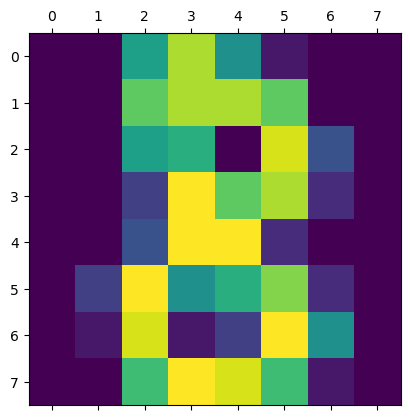

In [5]:
plt.matshow(digits.images[8])

In [6]:
X_digits = digits.data # Datos
y_digits = digits.target # Labels (número de 0 a 9)
y_digits.shape

(1797,)

# T-SNE de Scikit-Learn

## Importación y declaración

- Se usan dos componentes para poder graficar en 2D.
- Se inicializa el embedding usando PCA en vez de random.

In [7]:
from sklearn.manifold import TSNE

# Bajar a 2 dimensiones para graficar
# Inicializar el embedding usando PCA en vez de random
tsne = TSNE(n_components=2, init="pca", learning_rate="auto", random_state = 42)

## Entrenamiento de modelo

In [8]:
# Ajustar el modelo TSNE y transformar los datos
X_digits_2d = tsne.fit_transform(X_digits)

## Visualización de resultados

- Se grafica cada *datapoint* en gráfico 2D segun componentes obtenidos luego de transformación con t-SNE.
- Se colorea cada *datapoint* según etiqueta real.
- Se grafican las etiquetas para una fácil visualización. 

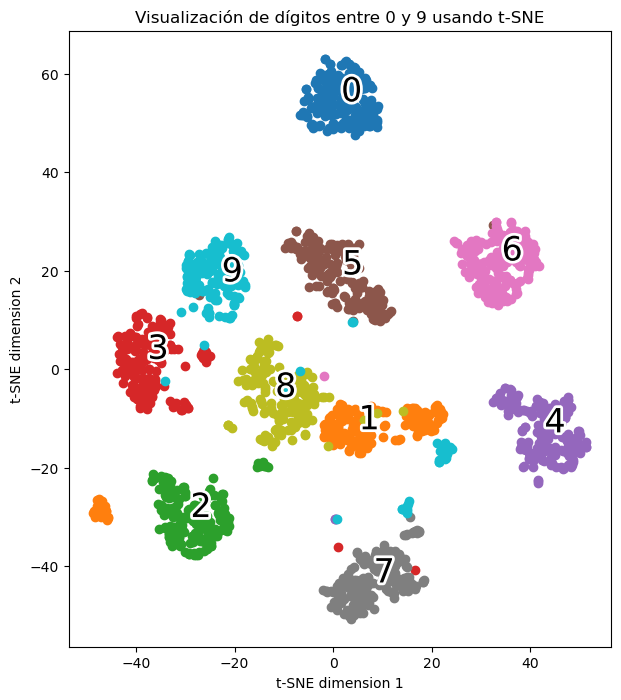

In [29]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(aspect="equal")
plt.title("Visualización de dígitos entre 0 y 9 usando t-SNE")
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
for i in range(10):
    plt.scatter(X_digits_2d[y_digits == i, 0], X_digits_2d[y_digits == i, 1])

# Para graficar las etiquetas de los números asociados a cada "cluster"
import matplotlib.patheffects as PathEffects
for i in range(10):
    # Ubicar etiqueta "n" en la mediana de los datos cuya etiqueta real es "n"
    xtext, ytext = np.median(X_digits_2d[y_digits == i, :], axis=0)
    # Graficar el número de la eiqueta
    txt = ax.text(xtext, ytext, str(i), fontsize=24)
    # Agregar borde blanco para mejorar visibilidad
    txt.set_path_effects([
        PathEffects.Stroke(linewidth=4, foreground="w"),
        PathEffects.Normal()])
    
plt.savefig("images/visualizacion digitos.svg")
plt.show()